In [1]:
import pandas as pd #Importing pandas library
from pandas import DataFrame 
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os

data = pd.read_csv("lin_deathrate.csv")
data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [2]:
#geographical location not relevant
data.drop('geography', axis=1, inplace=True)
#lots of empty cells (75% missing)
data.drop('pctsomecol18_24', axis=1, inplace=True)
data.drop('binnedinc', axis=1, inplace=True)
data.columns
data = data.fillna(data.mean())

<AxesSubplot:>

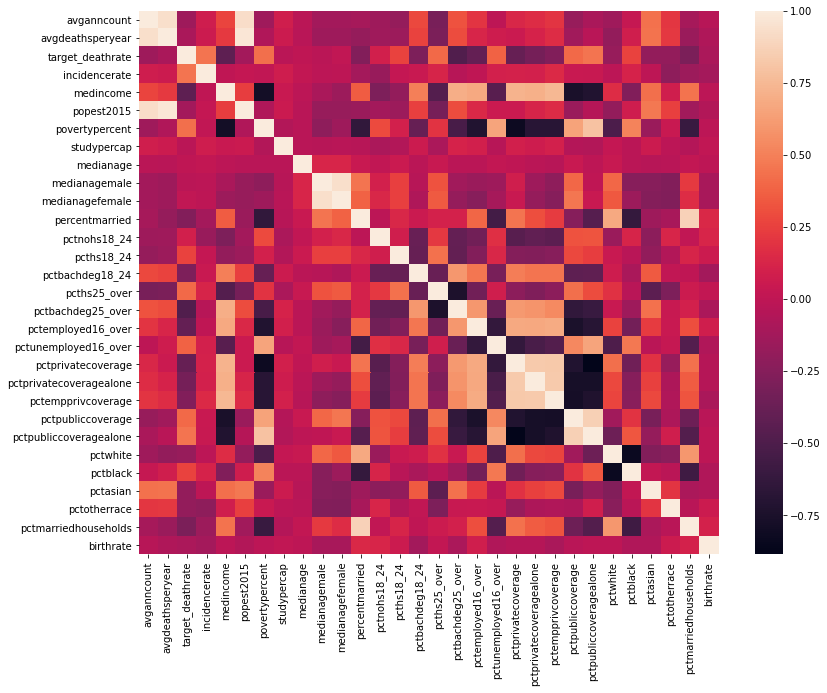

In [3]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(data.corr( ), annot=False, xticklabels=True, yticklabels=True,)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data[:] = scaler.fit_transform(data[:])
df_scaled = pd.DataFrame(data[:], columns=data.columns[:])
df_scaled

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,0.036467,0.033269,0.347080,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,...,0.518256,0.491259,0.402597,0.259091,0.797112,0.030190,0.113138,0.043965,0.542157,0.286917
1,0.004378,0.004783,0.335203,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231678,...,0.602848,0.526224,0.369202,0.288636,0.880051,0.011275,0.052704,0.089228,0.406297,0.203182
2,0.002517,0.003355,0.379413,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,...,0.439873,0.374126,0.573284,0.420455,0.898912,0.008606,0.010932,0.065522,0.571001,0.174879
3,0.011037,0.014207,0.445727,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,...,0.389241,0.375874,0.632653,0.509091,0.908071,0.009106,0.027250,0.032498,0.508852,0.215878
4,0.001337,0.001642,0.279446,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,...,0.446203,0.377622,0.608534,0.456818,0.934344,0.003144,0.015623,0.011737,0.563423,0.318700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0.051297,0.000857,0.296602,0.250845,0.236138,0.000542,0.208145,0.000000,0.036397,0.442080,...,0.620253,0.543706,0.380334,0.240909,0.891770,0.044652,0.007687,0.040555,0.509620,0.364506
3043,0.051297,0.002856,0.298251,0.250845,0.252138,0.003569,0.352941,0.038636,0.013462,0.163121,...,0.594937,0.613636,0.326531,0.343182,0.729471,0.027072,0.094908,0.336995,0.526760,0.383870
3044,0.051297,0.003070,0.310789,0.250845,0.276751,0.003315,0.266968,0.201690,0.014293,0.191489,...,0.583861,0.599650,0.285714,0.322727,0.865944,0.026914,0.030889,0.135480,0.583874,0.366179
3045,0.051297,0.003498,0.380403,0.250845,0.272877,0.002437,0.228507,0.000000,0.027755,0.342790,...,0.642405,0.631119,0.339518,0.259091,0.920999,0.013689,0.005740,0.050841,0.644333,0.355570


In [5]:
from sklearn.model_selection import train_test_split
# remove target variable from dataset to make feature matrix (X)
X = df_scaled.drop(columns=['target_deathrate'])
# target vector (y) - desired output
y = df_scaled.target_deathrate

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf = rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
rf

RandomForestRegressor()

In [7]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2 for Multiple Linear Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2 for Multiple Linear Regression Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training R2 for Multiple Linear Regression Model:  0.9332347711691913
Testing R2 for Multiple Linear Regression Model:  0.5572595414205408
RMSE for Training Data:  0.023477415220499908
RMSE for Testing Data:  0.062247074956527655


In [8]:
true_val = y_test
pred_val = y_pred_test

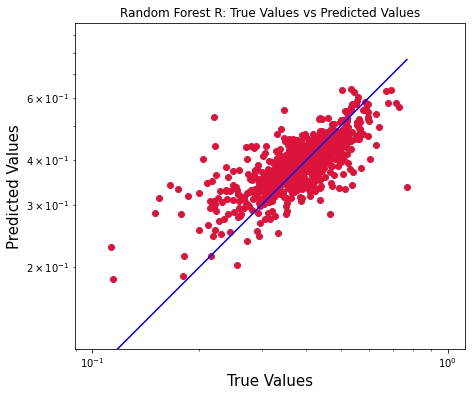

In [12]:
plt.figure(figsize=(7,6))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest R: True Values vs Predicted Values")
plt.axis('equal')
plt.show()